In [1]:
from qiskit import *
# Version
print(qiskit.__qiskit_version__)
from qiskit import IBMQ
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
%matplotlib inline

{'qiskit-terra': '0.17.4', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.13.1', 'qiskit-aqua': '0.9.1', 'qiskit': '0.26.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}


In [ ]:
# API Token
from dotenv import load_dotenv
import os

load_dotenv()

API_TOKEN = os.getenv("IBM_API_TOKEN")

IBMQ.save_account(API_TOKEN, overwrite=True)

In [2]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
# Secret Number
secretnumber = '1101'

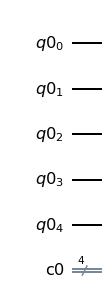

In [4]:
# 7 qubit quantum register
qr = QuantumRegister(len(secretnumber) + 1)
# 6 bit register
cr = ClassicalRegister(len(secretnumber))

# Circuit
circuit = QuantumCircuit(qr, cr)
circuit.draw(output='mpl');

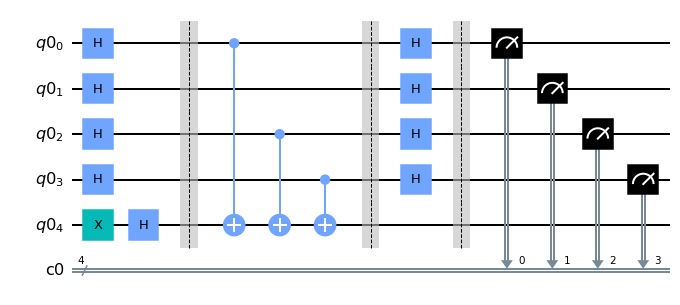

In [5]:
# Apply hadamard gate
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()


for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))
        
circuit.barrier()

circuit.h(range(len(secretnumber)))

circuit.barrier()

circuit.measure(range(len(secretnumber)), range(len(secretnumber)))
circuit.draw(output='mpl');

In [6]:
# Run simulator
simulator = simulator = Aer.get_backend('qasm_simulator')
result = execute(experiments=circuit, backend=simulator, shots=1).result()
counts = result.get_counts(circuit)
print(counts)

{'1101': 1}


In [7]:
# Execute on quantum computer
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_manila')
# qcomp = provider.get_backend('ibmq_16_melbourne')
# Execute circut on quantum computer
job = execute(experiments=circuit, backend=qcomp, shots=1)
job_monitor(job)
# Plot result
qresult = job.result()
counts = qresult.get_counts(circuit)
print(counts)

Job Status: job has successfully run
{'1101': 1}
